In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import seaborn as sns

# Question 1

In [3]:
sp = pd.read_csv('./sp_2016_20220915.csv')

### 1a)

In [11]:
print(sp.shape)

(817238, 13)


Rows: 817,238

Columns: 13

### 1b)

In [12]:
print(sp.columns)

Index(['symbol', 'sector', 'industry', 'date', 'Open', 'High', 'Low', 'Close',
       'marketCap', 'spy_Open', 'spy_Close', 'spy_ret', 'ret'],
      dtype='object')


#### Column Names

- symbol
- sector
- industry
- date 
- Open
- High
- Low
- Close
- marketCap
- spy_Open
- spy_Close
- spy_ret
- ret

### 1c)

In [13]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817238 entries, 0 to 817237
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   symbol     817238 non-null  object 
 1   sector     817238 non-null  object 
 2   industry   817238 non-null  object 
 3   date       817238 non-null  object 
 4   Open       817238 non-null  float64
 5   High       817238 non-null  float64
 6   Low        817238 non-null  float64
 7   Close      817238 non-null  float64
 8   marketCap  817238 non-null  float64
 9   spy_Open   817238 non-null  float64
 10  spy_Close  817238 non-null  float64
 11  spy_ret    817238 non-null  float64
 12  ret        817238 non-null  float64
dtypes: float64(9), object(4)
memory usage: 81.1+ MB


In [29]:
sp['date'] = pd.to_datetime(sp['date'])

In [30]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817238 entries, 0 to 817237
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   symbol     817238 non-null  object        
 1   sector     817238 non-null  object        
 2   industry   817238 non-null  object        
 3   date       817238 non-null  datetime64[ns]
 4   Open       817238 non-null  float64       
 5   High       817238 non-null  float64       
 6   Low        817238 non-null  float64       
 7   Close      817238 non-null  float64       
 8   marketCap  817238 non-null  float64       
 9   spy_Open   817238 non-null  float64       
 10  spy_Close  817238 non-null  float64       
 11  spy_ret    817238 non-null  float64       
 12  ret        817238 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(3)
memory usage: 81.1+ MB


sp['date'] = pd.to_datetime(sp['date']) changes the data type of 'date' from object to datatime. This is shown in the second sp.info() call

### 1d)

In [31]:
print(sp.symbol.nunique())

491


In [32]:
print(sp.symbol.unique())

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABMD' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM'
 'ADP' 'ADSK' 'AEE' 'AEP' 'AES' 'AFL' 'AIG' 'AIZ' 'AJG' 'AKAM' 'ALB'
 'ALGN' 'ALK' 'ALL' 'ALLE' 'AMAT' 'AMCR' 'AMD' 'AME' 'AMGN' 'AMP' 'AMT'
 'AMZN' 'ANET' 'ANSS' 'AON' 'AOS' 'APD' 'APH' 'APTV' 'ARE' 'ATO' 'ATVI'
 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP' 'AZO' 'BA' 'BAC' 'BAX' 'BBWI' 'BBY' 'BDX'
 'BEN' 'BF-B' 'BIIB' 'BIO' 'BK' 'BKNG' 'BKR' 'BLK' 'BMY' 'BR' 'BRK-B'
 'BRO' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CAT' 'CB' 'CBOE' 'CBRE' 'CCI'
 'CCL' 'CDNS' 'CDW' 'CE' 'CF' 'CFG' 'CHD' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL'
 'CLX' 'CMA' 'CMCSA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COO' 'COP'
 'COST' 'CPB' 'CPRT' 'CPT' 'CRL' 'CRM' 'CSCO' 'CSX' 'CTAS' 'CTLT' 'CTRA'
 'CTSH' 'CTXS' 'CVS' 'CVX' 'CZR' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DG' 'DGX'
 'DHI' 'DHR' 'DIS' 'DISH' 'DLR' 'DLTR' 'DOV' 'DPZ' 'DRE' 'DRI' 'DUK' 'DVA'
 'DVN' 'DXC' 'DXCM' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR'
 'ENPH' 'EOG' 'EPAM' 'EQIX' 'EQR' 'ES' 'ESS' 'ETN' 'ETR' '

### 1e)

In [58]:
days_by_symbol = pd.DataFrame( sp['symbol'].value_counts() )
days_by_symbol.columns = ['days']
days_by_symbol.head()

,days
symbol,
A,1688
NOW,1688
O,1688
NXPI,1688
NWSA,1688


In [38]:
days_by_symbol.describe()

,count
count,491.000000
mean,1664.435845
std,146.359850
min,165.000000
25%,1688.000000
50%,1688.000000
75%,1688.000000
max,1688.000000


In [41]:
num_full_period_stocks = (days_by_symbol['days'] == 1688).sum()
print(num_full_period_stocks)

475


There are 491 symbols. 475 symbols have data over the entire period. The maximum number of days a symbol has is 1688 days.

# Question 2

### 2a)

In [42]:
sp_ = sp[['symbol', 'sector' , 'industry' , 'date' , 'marketCap' , 'ret', 
          'spy_ret', 'Close' , 'spy_Close']]
sp_['total_mkt_cap']=sp_.groupby(['date'])['marketCap'].transform(sum)
sp_.head()


/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_1996/2896716221.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sp_['total_mkt_cap']=sp_.groupby(['date'])['marketCap'].transform(sum)
/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_1996/2896716221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_['total_mkt_cap']=sp_.groupby(['date'])['marketCap'].transform(sum)


,symbol,sector,industry,date,marketCap,ret,spy_ret,Close,spy_Close,total_mkt_cap
0,A,Healthcare,Diagnostics & Research,2016-01-04,1.141576e+10,-0.026788,-0.01398,38.535370,178.051269,1.416114e+13
1,AAL,Industrials,Airlines,2016-01-04,2.497874e+10,-0.034002,-0.01398,39.095463,178.051269,1.416114e+13
2,AAP,Consumer Cyclical,Specialty Retail,2016-01-04,8.788413e+09,0.011495,-0.01398,144.105057,178.051269,1.416114e+13
3,AAPL,Technology,Consumer Electronics,2016-01-04,3.918760e+11,0.000855,-0.01398,24.151497,178.051269,1.416114e+13
4,ABBV,Healthcare,Drug Manufacturers—General,2016-01-04,7.365915e+10,-0.027515,-0.01398,42.857121,178.051269,1.416114e+13


### 2b)

In [43]:
sp_['mkt_cap_weight'] = sp_['marketCap'] / sp_['total_mkt_cap']

/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_1996/3917920024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_['mkt_cap_weight'] = sp_['marketCap'] / sp_['total_mkt_cap']


In [57]:
sp_['mkt_cap_weight'].head()

0    0.000806
1    0.001764
2    0.000621
3    0.027673
4    0.005201
Name: mkt_cap_weight, dtype: float64

### 2c)

In [47]:
sp_['mkt_cap*ret'] = sp_['mkt_cap_weight']*sp_['ret']
sp_['mcapwtd_ret'] = sp_.groupby('date')['mkt_cap*ret'].transform(sum)
sp_.head()


/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_1996/2200373557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_['mkt_cap*ret'] = sp_['mkt_cap_weight']*sp_['ret']
/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_1996/2200373557.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sp_['mcapwtd_ret'] = sp_.groupby('date')['mkt_cap*ret'].transform(sum)


,symbol,sector,industry,date,marketCap,ret,spy_ret,Close,spy_Close,total_mkt_cap,mkt_cap_weight,mkt_cap*ret,mcapwtd_ret
0,A,Healthcare,Diagnostics & Research,2016-01-04,1.141576e+10,-0.026788,-0.01398,38.535370,178.051269,1.416114e+13,0.000806,-0.000022,-0.015257
1,AAL,Industrials,Airlines,2016-01-04,2.497874e+10,-0.034002,-0.01398,39.095463,178.051269,1.416114e+13,0.001764,-0.000060,-0.015257
2,AAP,Consumer Cyclical,Specialty Retail,2016-01-04,8.788413e+09,0.011495,-0.01398,144.105057,178.051269,1.416114e+13,0.000621,0.000007,-0.015257
3,AAPL,Technology,Consumer Electronics,2016-01-04,3.918760e+11,0.000855,-0.01398,24.151497,178.051269,1.416114e+13,0.027673,0.000024,-0.015257
4,ABBV,Healthcare,Drug Manufacturers—General,2016-01-04,7.365915e+10,-0.027515,-0.01398,42.857121,178.051269,1.416114e+13,0.005201,-0.000143,-0.015257


In [56]:
sp_[['symbol','mkt_cap*ret', 'mcapwtd_ret']].head()

,symbol,mkt_cap*ret,mcapwtd_ret
0,A,-0.000022,-0.015257
1,AAL,-0.000060,-0.015257
2,AAP,0.000007,-0.015257
3,AAPL,0.000024,-0.015257
4,ABBV,-0.000143,-0.015257


'mkt_cap*ret' reflects the contribution of a stock to the return of the market-cap-portfolio because this column is calculated by multiplying each stock's weight by its individual return 'ret'. 

# Question 3

### 3a)

In [89]:
df0 = sp_[['date', 'spy_ret', 'mcapwtd_ret']]
df0 = df0.drop_duplicates()
df0 = df0.reset_index()
df0 = df0[['date', 'spy_ret', 'mcapwtd_ret']]
print(sp_.shape, df0.shape)
df0.head()


(817238, 13) (1688, 3)


,date,spy_ret,mcapwtd_ret
0,2016-01-04,-0.013980,-0.015257
1,2016-01-05,0.001692,0.002271
2,2016-01-06,-0.012614,-0.011768
3,2016-01-07,-0.023992,-0.023134
4,2016-01-08,-0.010977,-0.011233


In [90]:
sector_mktcap = sp.groupby(['date', 'sector'])['marketCap'].sum().reset_index()
sector_mktcap

,date,sector,marketCap
0,2016-01-04,Basic Materials,3.107655e+11
1,2016-01-04,Communication Services,1.813046e+12
2,2016-01-04,Consumer Cyclical,1.093765e+12
3,2016-01-04,Consumer Defensive,1.436126e+12
4,2016-01-04,Energy,8.425874e+11
...,...,...,...
18563,2022-09-15,Healthcare,4.820890e+12
18564,2022-09-15,Industrials,2.933263e+12
18565,2022-09-15,Real Estate,9.314557e+11
18566,2022-09-15,Technology,8.106057e+12


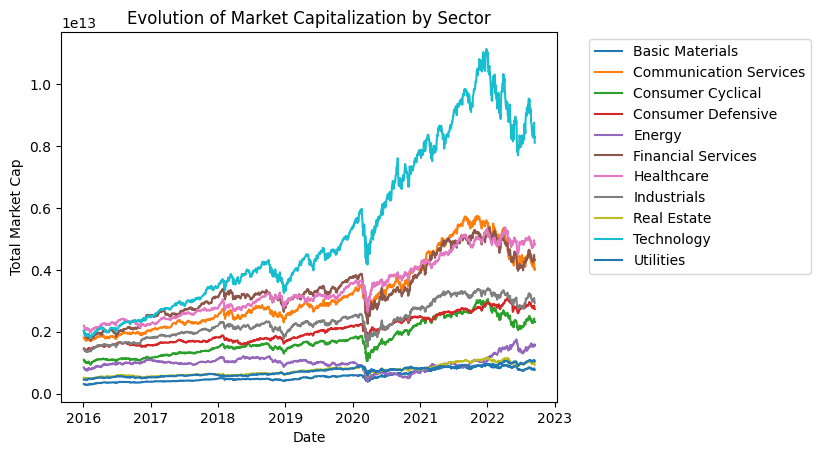

In [91]:
for sector in sector_mktcap['sector'].unique():
    temp = sector_mktcap[sector_mktcap['sector'] == sector]
    plt.plot(temp['date'], temp['marketCap'], label=sector)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Evolution of Market Capitalization by Sector")
plt.xlabel("Date")
plt.ylabel("Total Market Cap")
plt.show()

##### All sectors saw growth over the period from 01-04-2016 to 09-15-2022. The fastest growing sector was technology. There was a dip in all sectors in early 2020, likely from COVID-19.

### 3b)

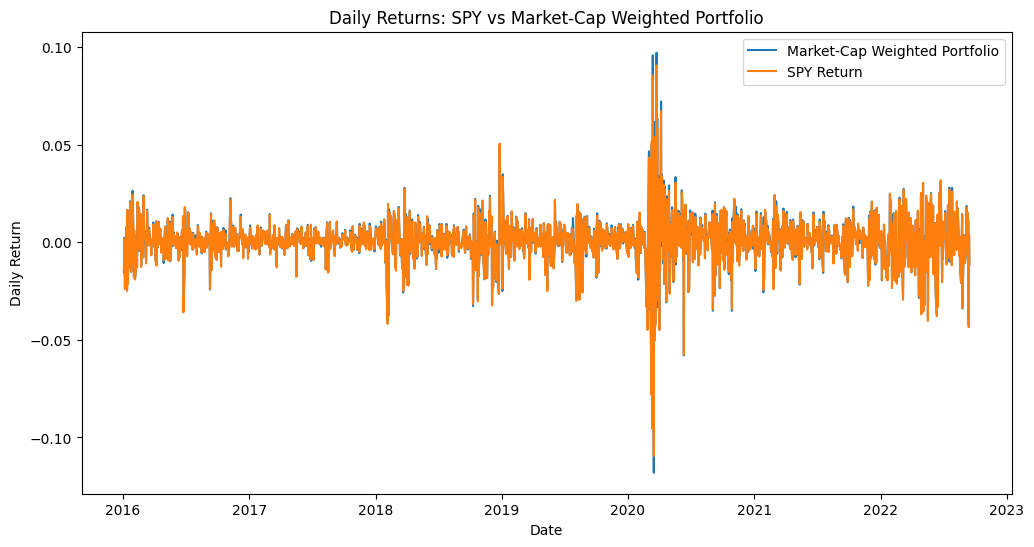

In [92]:
plt.figure(figsize=(12,6))
plt.plot(df0['date'], df0['mcapwtd_ret'], label='Market-Cap Weighted Portfolio')
plt.plot(df0['date'], df0['spy_ret'], label='SPY Return')
plt.title('Daily Returns: SPY vs Market-Cap Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


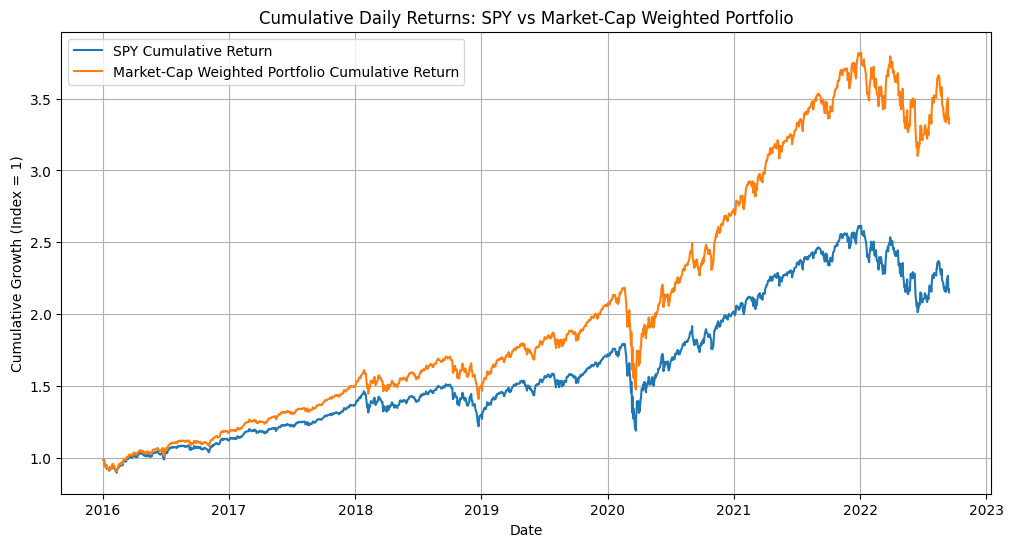

In [93]:
df0['cum_spy'] = (1 + df0['spy_ret']).cumprod()
df0['cum_mcap'] = (1 + df0['mcapwtd_ret']).cumprod()

plt.figure(figsize=(12,6))
plt.plot(df0['date'], df0['cum_spy'], label='SPY Cumulative Return')
plt.plot(df0['date'], df0['cum_mcap'], label='Market-Cap Weighted Portfolio Cumulative Return')
plt.title('Cumulative Daily Returns: SPY vs Market-Cap Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Growth (Index = 1)')
plt.legend()
plt.grid(True)
plt.show()



This graph shows that the Market-cap weighted portfolio out performed the SPY over the data collection period

### 3c)

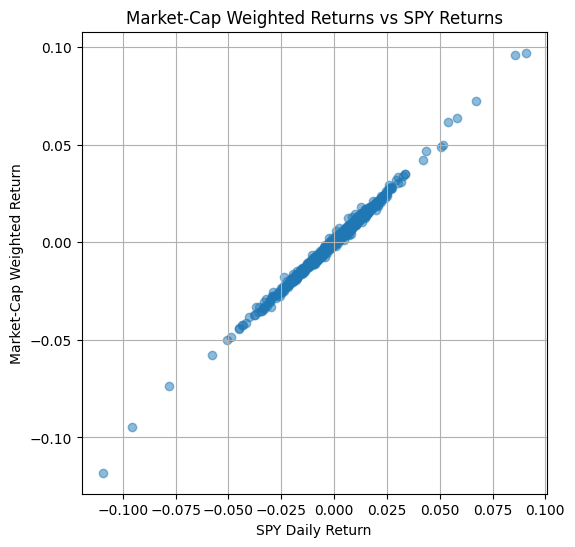

In [94]:
plt.figure(figsize=(6,6))
plt.scatter(df0['spy_ret'], df0['mcapwtd_ret'], alpha=0.5)
plt.title('Market-Cap Weighted Returns vs SPY Returns')
plt.xlabel('SPY Daily Return')
plt.ylabel('Market-Cap Weighted Return')
plt.grid(True)
plt.show()


### 3d)

In [95]:
df0[['spy_ret', 'mcapwtd_ret']].describe()

,spy_ret,mcapwtd_ret
count,1688.000000,1688.000000
mean,0.000524,0.000784
std,0.011817,0.011966
min,-0.109424,-0.118082
25%,-0.003415,-0.003089
50%,0.000711,0.000979
75%,0.005828,0.005986
max,0.090603,0.097089


In [96]:
corr = df0['spy_ret'].corr(df0['mcapwtd_ret'])
print(f"Correlation between SPY Returns and Market Cap Weighted Returns",corr)


Correlation between SPY Returns and Market Cap Weighted Returns 0.9967540821903276


The correlation between SPY and the Market Cap Weighted Portfolio is close to 1, showing that there is an extremely high correlation between the two portfolios 

# Question 4

In [99]:
sp_['_ret_'] = abs(sp_['ret'])
sp_['prev_ret'] = sp_.groupby(['symbol'])['ret'].shift(1)
sp_['next_ret'] = sp_.groupby(['symbol'])['ret'].shift(-1)
sp_['_prev_ret_'] = abs(sp_['prev_ret'])
sp_['_next_ret_'] = abs(sp_['next_ret'])
sp_['prev_spy_ret'] = sp_.groupby(['symbol'])['spy_ret'].shift(1)
sp_['next_spy_ret'] = sp_.groupby(['symbol'])['spy_ret'].shift(-1)
sp_= sp_.dropna()
sp_


,symbol,sector,industry,date,marketCap,ret,spy_ret,Close,spy_Close,total_mkt_cap,mkt_cap_weight,mkt_cap*ret,mcapwtd_ret,_ret_,prev_ret,next_ret,_prev_ret_,_next_ret_,prev_spy_ret,next_spy_ret
1428,A,Healthcare,Diagnostics & Research,2016-01-07,1.094162e+10,-0.042475,-0.023992,36.934864,171.877670,1.368222e+13,0.000800,-3.396692e-05,-0.023134,0.042475,0.004439,-0.010513,0.004439,0.010513,-0.012614,-0.010977
1429,AAL,Industrials,Airlines,2016-01-07,2.469787e+10,-0.018918,-0.023992,38.655857,171.877670,1.368222e+13,0.001805,-3.414966e-05,-0.023134,0.018918,0.017522,-0.001978,0.017522,0.001978,-0.012614,-0.010977
1430,AAP,Consumer Cyclical,Specialty Retail,2016-01-07,8.591558e+09,0.011073,-0.023992,140.877197,171.877670,1.368222e+13,0.000628,6.953055e-06,-0.023134,0.011073,-0.026455,-0.021972,0.026455,0.021972,-0.012614,-0.010977
1431,AAPL,Technology,Consumer Electronics,2016-01-07,3.587700e+11,-0.042204,-0.023992,22.111174,171.877670,1.368222e+13,0.026222,-1.106665e-03,-0.023134,0.042204,-0.019570,0.005288,0.019570,0.005288,-0.012614,-0.010977
1432,ABBV,Healthcare,Drug Manufacturers—General,2016-01-07,7.314773e+10,-0.002962,-0.023992,42.559559,171.877670,1.368222e+13,0.005346,-1.583807e-05,-0.023134,0.002962,0.000174,-0.027268,0.000174,0.027268,-0.012614,-0.010977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815760,YUM,Consumer Cyclical,Restaurants,2022-09-12,3.448918e+10,0.010078,0.010748,117.260002,409.288727,3.530169e+13,0.000977,9.846471e-06,0.009933,0.010078,-0.002320,-0.031383,0.002320,0.031383,0.015535,-0.043483
815761,ZBH,Healthcare,Medical Devices,2022-09-12,2.497134e+10,0.041659,0.010748,119.269997,409.288727,3.530169e+13,0.000707,2.946856e-05,0.009933,0.041659,0.033487,-0.024063,0.033487,0.024063,0.015535,-0.043483
815762,ZBRA,Technology,Communication Equipment,2022-09-12,1.678150e+10,0.013026,0.010748,311.850006,409.288727,3.530169e+13,0.000475,6.192351e-06,0.009933,0.013026,0.031981,-0.058842,0.031981,0.058842,0.015535,-0.043483
815763,ZION,Financial Services,Banks—Regional,2022-09-12,9.185859e+09,-0.000852,0.010748,58.619999,409.288727,3.530169e+13,0.000260,-2.217540e-07,0.009933,0.000852,0.007037,-0.022518,0.007037,0.022518,0.015535,-0.043483


- sp_['_ret_'] -> Creates a new column equal to the absolute value of each stock's return
- sp_['prev_ret'] -> Grabs the previous day's return for that stock
- sp_['next_ret'] -> Grabs the following day's return for that stock
- sp_['_prev_ret_'] -> The absolute value of the new sp_['prev_ret'] column
- sp_['_next_ret_'] -> The absolute value of the new sp_['next_ret'] column
- sp_['prev_spy_ret'] -> Gets the SPY's previous day return associated with that stock
- sp_['next_spy_ret'] -> Gets the SPY's next day return associated with that stock



The significance of groupby('symbol') in previous and next-returns is that it ensures it grabs the previous day for the correct symbol. For example if you want to grab the next return for symbol A on the last day, it should be a null value. However, without the groupby('symbol'), the next return will be the first day return for AAL.

# Question 5

### 5a)

In [100]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [101]:
model = smf.ols('next_ret ~ ret + prev_ret', data=sp_).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               next_ret   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1340.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:52:58   Log-Likelihood:             1.9771e+06
No. Observations:              814292   AIC:                        -3.954e+06
Df Residuals:                  814289   BIC:                        -3.954e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007   2.37e-05     30.408      0.0

Directional impact:
 - ret: Negative coefficient of -0.0418 meaning that large gains today are followed by slightly lower return tomorrow
 - prev_ret: Negative coefficient of 0.0375 meaning that strong returns yesterday are associated with slightly higher returns tomorrow

This model has very low predictive power as shown by the low R-squared value of 0.003. THis shows that next-day stock returns are largely random.

### 5b)

In [102]:
_sp_5 = sp_[ (abs( sp_['ret']) < 0.05) & ( abs( sp_['prev_ret']) < 0.05) ]
print( sp_.shape, _sp_5.shape)

(814292, 20) (769527, 20)


In [ ]:
_sp_5[['ret', 'prev_ret']].describe()

,ret,prev_ret
count,769527.000000,769527.000000
mean,0.000708,0.000759
std,0.015234,0.015254
min,-0.050000,-0.050000
25%,-0.007596,-0.007573
50%,0.000926,0.000949
75%,0.009358,0.009407
max,0.050000,0.050000


max for 'ret' < 0.05 and 'prev_ret' < 0.05

In [108]:
model_5 = smf.ols('next_ret ~ ret + prev_ret', data=_sp_5).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:               next_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     71.39
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           9.92e-32
Time:                        15:11:48   Log-Likelihood:             1.9710e+06
No. Observations:              769527   AIC:                        -3.942e+06
Df Residuals:                  769524   BIC:                        -3.942e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007   2.13e-05     33.950      0.0

# Question 6

In [109]:
model_abs = smf.ols('_next_ret_ ~ _ret_ + _prev_ret_', data=sp_).fit()
print(model_abs.summary())


                            OLS Regression Results                            
Dep. Variable:             _next_ret_   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 6.824e+04
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:13:06   Log-Likelihood:             2.2524e+06
No. Observations:              814292   AIC:                        -4.505e+06
Df Residuals:                  814289   BIC:                        -4.505e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0073   2.42e-05    300.317      0.0

The model predicting abs(next-day-returns) had better predictive power, as shown by the larger R-squared value of 0.144 compared to 0.003 for the model predicting next-day-returns. The model predicting abs(next-day-returns) is a measure of volatility because the the absolute value captures the magnitude of stock price movement, rather than the direction of the stock.

# Question 7

In [110]:
model_ret = smf.ols('ret ~ spy_ret', data=sp_).fit()
print(model_ret.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                 3.902e+05
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:21:24   Log-Likelihood:             2.1357e+06
No. Observations:              814292   AIC:                        -4.271e+06
Df Residuals:                  814290   BIC:                        -4.271e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.95e-05      7.036      0.0

- The intercept has a coefficient of 0.0001, meaning that when the SPY has a return of 0, the stock has an average return of 0.01%
- The spy_ret variable has a coefficient of 1.0306 meaning the for every 1% move in SPY, the stock moves about 1.03% in the same direction

- The model has an R-squared of 0.324 meaning that about 32.4% of the variation in the stock's daily return is explained by SPY returns

# Question 8

In [111]:
model_next = smf.ols('next_ret ~ spy_ret', data=sp_).fit()
print(model_next.summary())

                            OLS Regression Results                            
Dep. Variable:               next_ret   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6224.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:25:54   Log-Likelihood:             1.9789e+06
No. Observations:              814292   AIC:                        -3.958e+06
Df Residuals:                  814290   BIC:                        -3.958e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008   2.36e-05     34.137      0.0

- The intercept has a coefficient of 0.0008, meaning that when the SPY has a return of 0, the expected next-day return has an average return of 0.08%
- The spy_ret variable has a coefficient of –0.1578 meaning the for every 1% move in SPY today, the stock tends to move slightly down tomorrow at about -0.16%.

- The model has an R-squared of 0.008 meaning that about 0.8% of the variation in the stock's next-day return is explained by today's SPY returns. Compared to the same-day model, with an R^2 of 0.324, the next-day model has significantly less predictive power